In [216]:
#this program is about testing the ANOVA Test 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
data = pd.DataFrame({'Normal Bone Density':[1200,1000,980,900,750,800],
                    'Osteopenia':[1000,1100,700,800,500,700],
                   'Osteoporosis':[890,650,1100,900,400,350]})

In [218]:
data

,Normal Bone Density,Osteopenia,Osteoporosis
0,1200,1000,890
1,1000,1100,650
2,980,700,1100
3,900,800,900
4,750,500,400
5,800,700,350


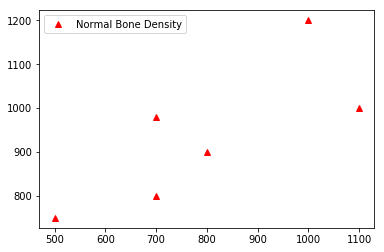

In [219]:
plt.plot(data['Osteopenia'],data['Normal Bone Density'],'^',color="red")
plt.legend()
plt.show()

In [220]:
data.columns

Index(['Normal Bone Density', 'Osteopenia', 'Osteoporosis'], dtype='object')

In [221]:
#performing ANOVA test
data.isnull().sum()

Normal Bone Density    0
Osteopenia             0
Osteoporosis           0
dtype: int64

In [222]:
print(data['Normal Bone Density'])

0    1200
1    1000
2     980
3     900
4     750
5     800
Name: Normal Bone Density, dtype: int64


In [223]:
#we have to find MSSW and MSSB
#taking all the mean 
normal_bone_mean = np.mean(data['Normal Bone Density'])
osteo1_mean = np.mean(data['Osteopenia'])
osteo2_mean = np.mean(data['Osteoporosis'])

In [224]:
print(normal_bone_mean)
print(osteo1_mean)
print(osteo2_mean)

938.3333333333334
800.0
715.0


In [225]:
#sum mean
sum_mean = normal_bone_mean + osteo1_mean + osteo2_mean
sum_mean = sum_mean / 3
print(sum_mean)

817.7777777777778


In [226]:
#calculating MSSW 
value_1 = np.sum([(data['Normal Bone Density'].loc[i] - normal_bone_mean) ** 2 for i in range(
    len(data['Normal Bone Density']))])
value_2 = np.sum([(data['Osteopenia'].loc[i] - osteo1_mean) ** 2 for i in range(
    len(data['Osteopenia']))])
value_3 = np.sum([(data['Osteoporosis'].loc[i] - osteo2_mean) ** 2 for i in range(
    len(data['Osteoporosis']))])
print(value_1)
print(value_2)
print(value_3)

130083.33333333334
240000.0
449750.0


In [227]:
sum_value = value_1 + value_2 + value_3
print(sum_value)

819833.3333333334


In [228]:
len_data = len(data['Normal Bone Density']) + len(data['Osteopenia']) + len(data['Osteoporosis'])

In [229]:
len_columns = len(data.columns)

In [241]:
MSSB = sum_value / (len_data-len_columns)

In [242]:
print(MSSB)

54655.555555555555


In [232]:
value_11 = len(data['Normal Bone Density']) * ((normal_bone_mean - sum_mean) ** 2)

In [233]:
value_12 = len(data['Osteoporosis']) * ((osteo2_mean - sum_mean) ** 2)

In [234]:
value_13 = len(data['Osteopenia']) * ((osteo1_mean - sum_mean) ** 2)

In [235]:
print(value_11)
print(value_12)
print(value_13)

87201.85185185184
63379.62962962969
1896.296296296307


In [236]:
sum_value1 = value_11 + value_12 + value_13

In [243]:
MSSW = sum_value1 / (len_columns-1)

In [244]:
print(MSSW)

76238.88888888892


In [245]:
f = MSSW/MSSB

In [246]:
f

1.3948973368570854

In [247]:
from scipy import stats

In [248]:
c,p = stats.f_oneway(data['Normal Bone Density'],data['Osteopenia'],data['Osteoporosis'])

In [249]:
c

1.3948973368570847

In [250]:
f_critical = 1.07

In [252]:
if(f<f_critical):
    print("Null Hypothesis is accepted")
else:
    print("Null Hypothesis is not accepted")

Null Hypothesis is not accepted


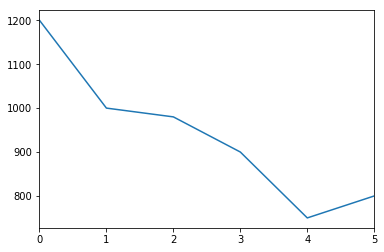

In [257]:
data['Normal Bone Density'].plot()

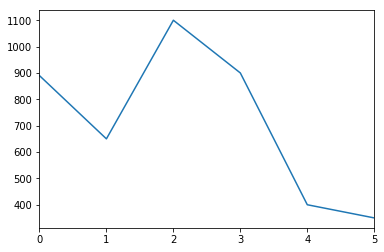

In [258]:
data['Osteoporosis'].plot()

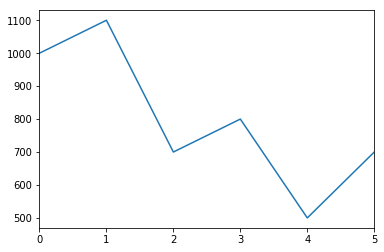

In [259]:
data['Osteopenia'].plot()